In [1]:
pip install fitter

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 25.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 48.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 341.8/341.8 kB 29.5 MB/s eta 0:00:00
  Created wheel for fitter: filename=fitter-1.6.0-py3-none-any.whl size=26054 sha256=e087476e867dd92d680f1b32ab7a44771eb79bcba126eb8c35e1c0e3ce637e04
  Stored in directory: /root/.cache/pip/wheels/26/f9/51/059fcaf0ba5aafd94463e31b343453c5cf165cea425f25c0f9
Successfully built fitter
  Attempting uninstall: pandas
    Found existing installation: pandas 1.5.3
    Uninstalling pandas-1.5.3:
      Successfully uninstalled pandas-1.5.3
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.7.1
    Uninstalling matplotlib-3.7.1:
      Successfully uninstalled matplotlib-3.7.1
ERROR: pip's depend

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
from scipy.integrate import quad
from sympy import symbols, solve
from fitter import Fitter
import math
import random
#import pynverse

: 

# Llegadas Mesa - IAM

In [ ]:
df_llegadas_mesas = pd.read_csv("/home/leanutn/Workspace/ypf_refineraria/pedidos.csv")

: 

array([[<Axes: title={'center': 'INTERVALO'}>]], dtype=object)

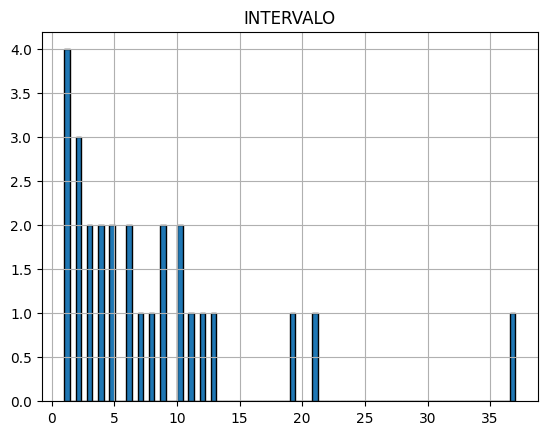

In [5]:
df_llegadas_mesas.hist('INTERVALO',bins = 80, edgecolor='black')

In [7]:
f_iam = Fitter(df_llegadas_mesas.INTERVALO)

In [8]:
f_iam.fit()

/usr/local/lib/python3.10/dist-packages/scipy/stats/_continuous_distns.py:3759: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  intgrl = integrate.quad(llc, x0, x1,
/usr/local/lib/python3.10/dist-packages/scipy/stats/_continuous_distns.py:3754: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  intgrl = (integrate.quad(llc, x0, mean,
/usr/local/lib/python3.10/dist-packages/scipy/stats/_continuous_distns.py:3756: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  + integrate.quad(llc, mean, x1,
/usr/local/lib/python3.10/dist-packages/scipy/integrate/_quadpack_py.py:1233: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local diffi

,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
ncx2,0.333543,1042.783002,1047.966350,inf,0.202512,1.900834e-01
genhyperbolic,0.334309,905.111940,911.591124,inf,0.749303,3.460183e-16
recipinvgauss,0.337507,852.961409,856.848920,inf,0.181258,3.000567e-01
weibull_min,0.338123,900.333870,904.221381,inf,0.158885,4.565520e-01
burr,0.338178,964.025938,969.209286,inf,0.205436,1.777709e-01


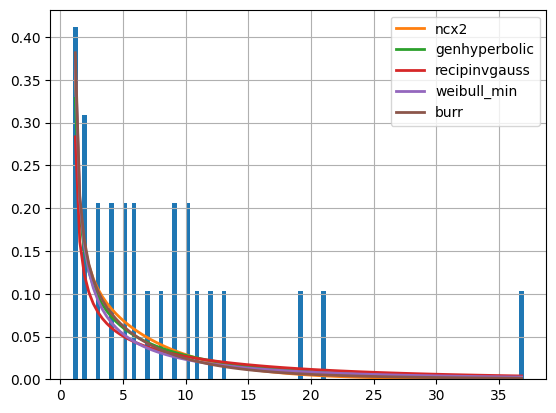

In [9]:
f_iam.summary()

In [10]:
f_iam.get_best(method = 'sumsquare_error')

{'ncx2': {'df': 0.886551685942953,
  'nc': 1.3962346932965461,
  'loc': 0.9999999999999999,
  'scale': 1.978240296417321}}

In [11]:
f_iam_df = 0.886551685942953
f_iam_nc = 1.3962346932965461
f_iam_loc = 0.9999999999999999
f_iam_scale = 1.978240296417321

## **FDP ncxw:**
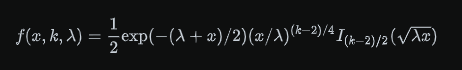

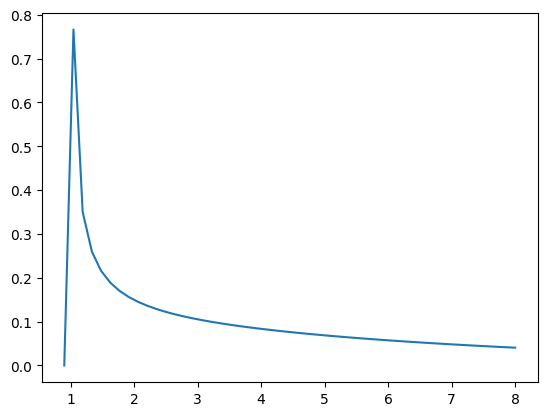

In [94]:
# Armo la distibucion y grafico su fdp f(x)
dist_iam = stats.ncx2(f_iam_df, f_iam_nc, loc=f_iam_loc, scale=f_iam_scale)
pdf_iam = dist_iam.pdf(x)
x = np.linspace(0.9, 8)
h = plt.plot(x, dist_iam.pdf(x))

## **CDF ncx2:**
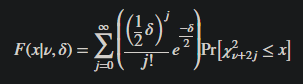

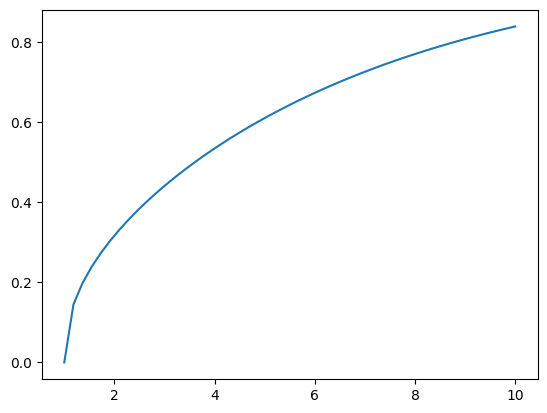

In [79]:
# Armo la funcion de densidad acumulada (F(x) o cdf)
cdf_iam = stats.ncx2.cdf(x, f_iam_df, f_iam_nc, loc=f_iam_loc, scale=f_iam_scale)
x = np.linspace(1, 10)
h = plt.plot(x, stats.ncx2.cdf(x, f_iam_df, f_iam_nc, loc=f_iam_loc, scale=f_iam_scale))

## **PPF (Inversa CDF)**

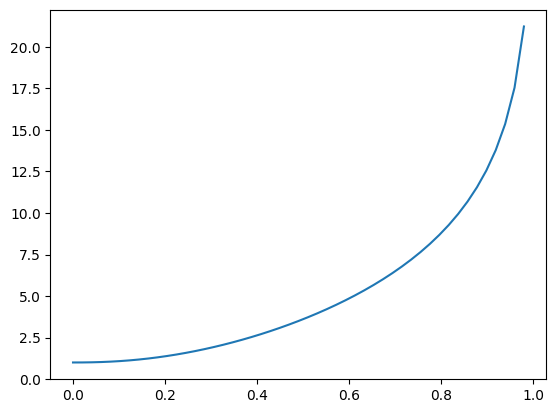

In [96]:
x = np.linspace(0, 1)
h = plt.plot(x, stats.ncx2.ppf(x, f_iam_df, f_iam_nc, loc=f_iam_loc, scale=f_iam_scale))

In [100]:
#valores random usando inversa (ppf supuestamente)
stats.ncx2.ppf(random.random(),  f_iam_df, f_iam_nc, loc=f_iam_loc, scale=f_iam_scale)

9.324039857826975

# **Llegadas Barra - IAB**

In [63]:
df_llegadas_barra = pd.read_csv("/content/llegadas_barra.csv")

array([[<Axes: title={'center': 'INTERVALO'}>]], dtype=object)

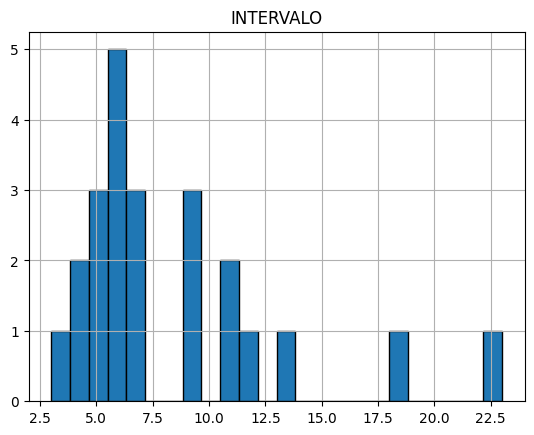

In [64]:
df_llegadas_barra.hist('INTERVALO',bins = 24, edgecolor='black')

In [65]:
f_iab = Fitter(df_llegadas_barra.INTERVALO)

In [66]:
f_iab.fit()

/usr/local/lib/python3.10/dist-packages/scipy/integrate/_quadpack_py.py:1233: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  quad_r = quad(f, low, high, args=args, full_output=self.full_output,
/usr/local/lib/python3.10/dist-packages/scipy/integrate/_quadpack_py.py:1233: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  quad_r = quad(f, low, high, args=args, full_output=self.full_output,


,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
foldcauchy,2.584179,771.146170,774.552653,inf,0.115879,0.882286
laplace_asymmetric,2.585129,735.331957,738.738440,inf,0.126830,0.808878
burr12,2.588169,758.549668,763.091645,inf,0.114087,0.892857
skewcauchy,2.588955,770.132696,773.539178,inf,0.118001,0.869188
cauchy,2.591773,839.990649,842.261637,inf,0.208334,0.235813


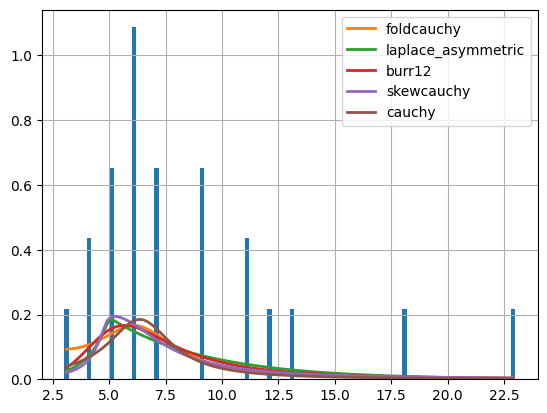

In [67]:
f_iab.summary()

In [68]:
f_iab.get_best(method = 'sumsquare_error')

{'foldcauchy': {'c': 1.4989669253762021,
  'loc': 2.9999999894637073,
  'scale': 2.1090617109085446}}

In [69]:
f_iab_c = 1.4989669253762021
f_iab_loc = 2.9999999894637073
f_iab_scale = 1.978240296417321

## **FDP foldcauchy:**
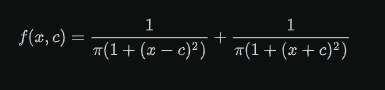


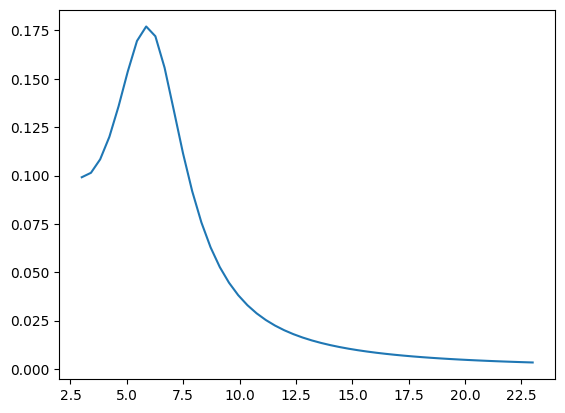

In [76]:
dist_iab = stats.foldcauchy(f_iab_c, loc=f_iab_loc, scale=f_iab_scale)
pdf_iab = dist_iab.pdf(x)
x = np.linspace(3, np.minimum(dist_iab.dist.b, 23))
h = plt.plot(x, dist_iab.pdf(x))

## **CDF foldcauchy:**

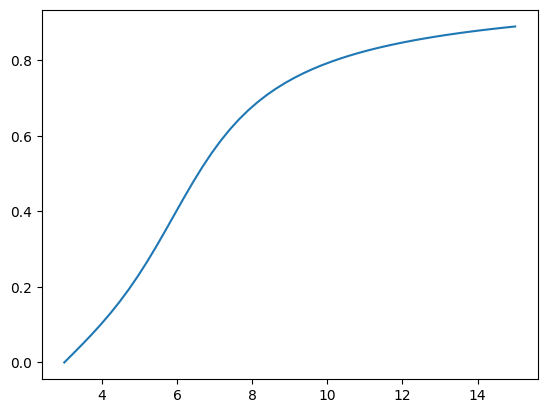

In [104]:
# Armo la funcion de densidad acumulada (F(x) o cdf)
cdf_iab = stats.foldcauchy.cdf(x, f_iab_c, loc=f_iab_loc, scale=f_iab_scale)
x = np.linspace(3, 15)
h = plt.plot(x, stats.foldcauchy.cdf(x, f_iab_c, loc=f_iab_loc, scale=f_iab_scale))

## **PPF (Inversa CDF)**


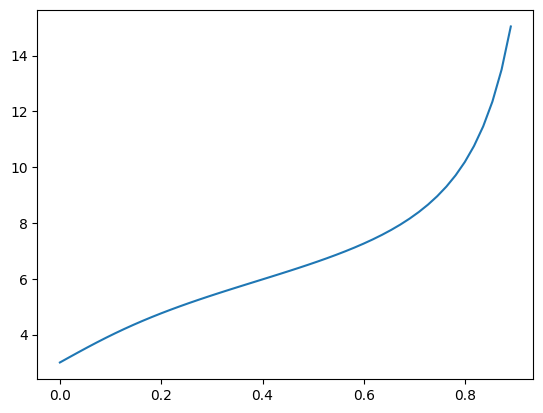

In [117]:
x = np.linspace(0, 0.89)
h = plt.plot(x, stats.foldcauchy.ppf(x, f_iab_c, loc=f_iab_loc, scale=f_iab_scale))

In [129]:
#valores random usando inversa (ppf supuestamente)
stats.foldcauchy.ppf(random.random(),  f_iab_c, loc=f_iab_loc, scale=f_iab_scale)

11.609618972626919

# **Atencion Mesas - TCM**

In [130]:
df_atencion_mesas = pd.read_csv("/content/atencion_mesas.csv")

array([[<Axes: title={'center': 'INTERVALO'}>]], dtype=object)

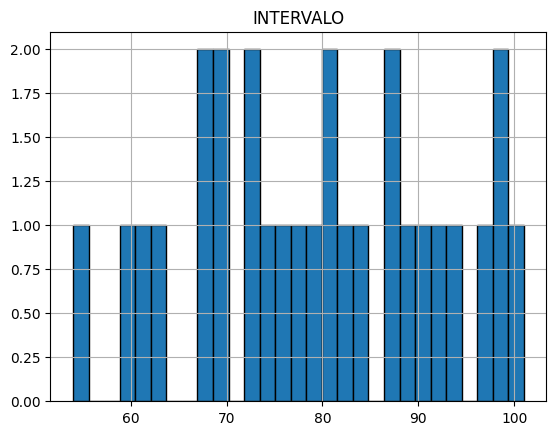

In [131]:
df_atencion_mesas.hist('INTERVALO',bins = 29, edgecolor='black')

In [132]:
f_tcm = Fitter(df_atencion_mesas.INTERVALO)

In [133]:
f_tcm.fit()

/usr/local/lib/python3.10/dist-packages/scipy/integrate/_quadpack_py.py:1233: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  quad_r = quad(f, low, high, args=args, full_output=self.full_output,
/usr/local/lib/python3.10/dist-packages/scipy/integrate/_quadpack_py.py:1233: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  quad_r = quad(f, low, high, args=args, full_output=self.full_output,


,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
beta,0.115311,787.810770,793.139588,inf,0.089024,0.965196
vonmises_line,0.115366,778.309849,782.306463,inf,0.100089,0.915435
kappa4,0.115703,778.774080,784.102898,inf,0.117968,0.788180
gausshyper,0.115895,792.718992,800.712220,inf,0.099342,0.919585
johnsonsb,0.116288,785.446872,790.775690,inf,0.075664,0.993326


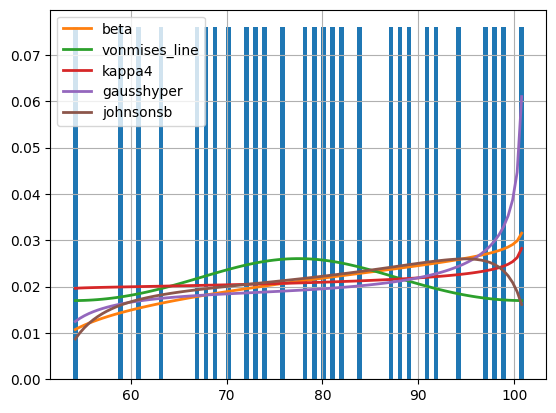

In [134]:
f_tcm.summary()

In [135]:
f_tcm.get_best(method = 'sumsquare_error')

{'beta': {'a': 1.2906427065990094,
  'b': 0.9533143680120876,
  'loc': 51.390356168638924,
  'scale': 49.60964383136108}}

In [136]:
f_tcm_a = 1.2906427065990094
f_tcm_b = 0.9533143680120876
f_tcm_loc = 51.390356168638924
f_tcm_scale = 49.60964383136108

## **FDP beta:**
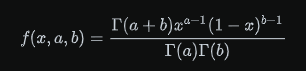

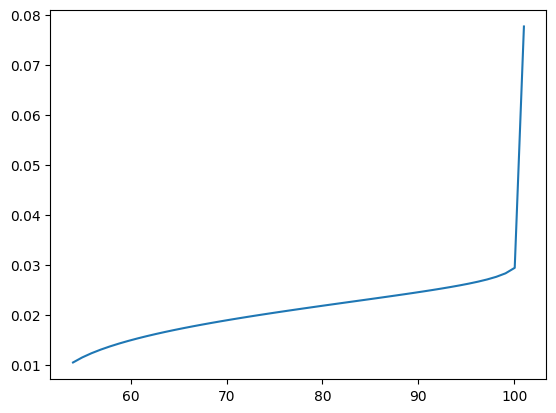

In [158]:
dist_tcm = stats.beta(f_tcm_a, f_tcm_b, loc=f_tcm_loc, scale=f_tcm_scale)
pdf_tcm = dist_tcm.pdf(x)
x = np.linspace(54, 100.999999999)
h = plt.plot(x, dist_tcm.pdf(x))

## **CDF beta:**
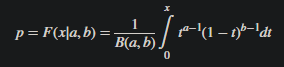

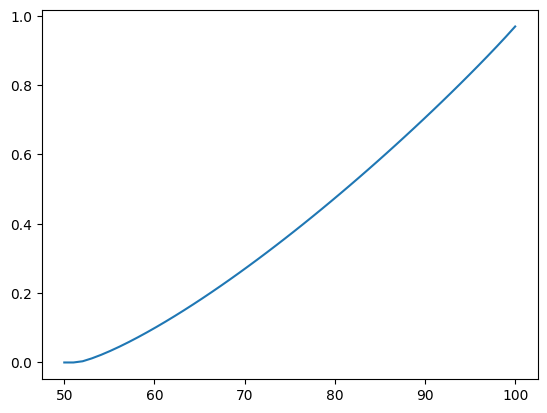

In [156]:
# Armo la funcion de densidad acumulada (F(x) o cdf)
cdf_tcm = stats.beta.cdf(x, f_tcm_a, f_tcm_b, loc=f_tcm_loc, scale=f_tcm_scale)
x = np.linspace(50, 100)
h = plt.plot(x, stats.beta.cdf(x, f_tcm_a, f_tcm_b, loc=f_tcm_loc, scale=f_tcm_scale))

## **PPF (Inversa CDF)**

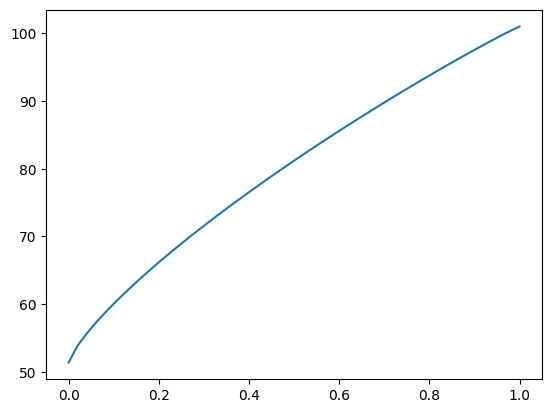

In [155]:
x = np.linspace(0, 1)
h = plt.plot(x, stats.beta.ppf(x, f_tcm_a, f_tcm_b, loc=f_tcm_loc, scale=f_tcm_scale))

In [165]:
#valores random usando inversa (ppf supuestamente)
stats.beta.ppf(random.random(),  f_tcm_a, f_tcm_b, loc=f_tcm_loc, scale=f_tcm_scale)

84.04296961514876

# **Atencion BARRA - TCB**

In [166]:
df_atencion_barra = pd.read_csv("/content/atencion_barra.csv")

array([[<Axes: title={'center': 'INTERVALO'}>]], dtype=object)

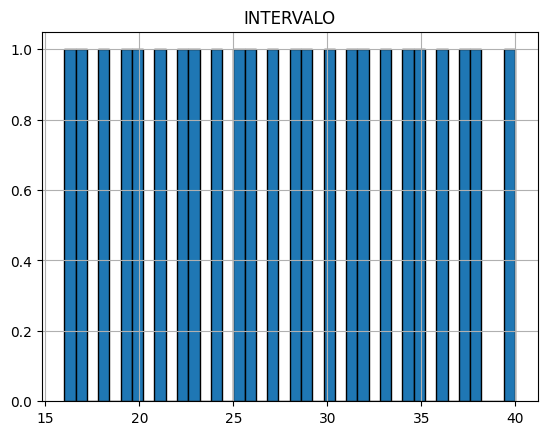

In [168]:
df_atencion_barra.hist('INTERVALO',bins = 40, edgecolor='black')

In [177]:
f_tcb = Fitter(df_atencion_barra.INTERVALO, distributions=['uniform'])

In [178]:
f_tcb.fit()

,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
uniform,0.549769,639.610766,641.966874,inf,0.041667,1.0


/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)


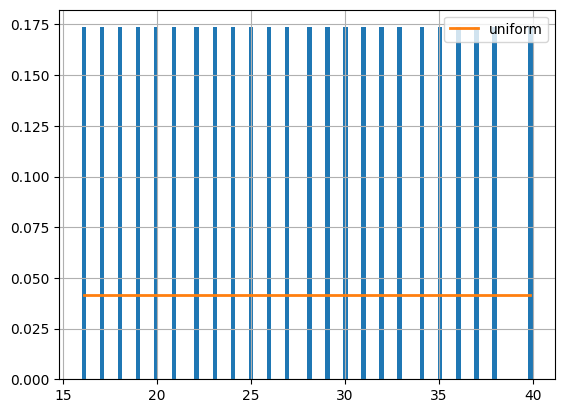

In [179]:
f_tcb.summary()

In [181]:
f_tcb.fitted_param["uniform"]

(16.0, 24.0)

In [182]:
f_tcb_loc = 16
f_tcb_scale = 24

## **FDP uniform:**

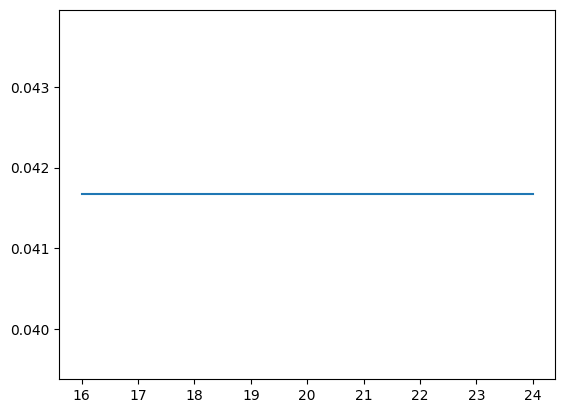

In [183]:
dist_tcb = stats.uniform(f_tcb_loc, f_tcb_scale)
pdf_tcb = dist_tcb.pdf(x)
x = np.linspace(16, 24)
h = plt.plot(x, dist_tcb.pdf(x))

## **CDF uniform:**

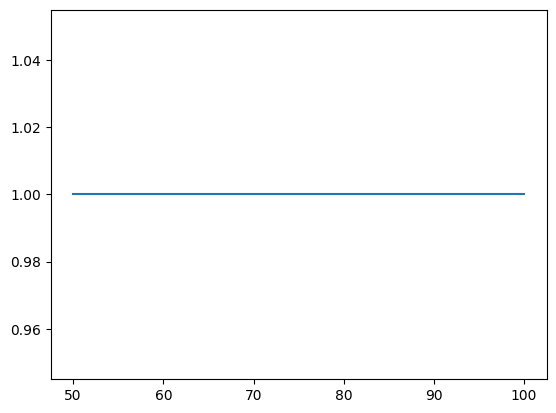

In [185]:
# Armo la funcion de densidad acumulada (F(x) o cdf)
cdf_tcm = stats.uniform.cdf(x, f_tcb_loc, f_tcb_scale)
x = np.linspace(50, 100)
h = plt.plot(x, stats.uniform.cdf(x, f_tcb_loc, f_tcb_scale))

## **PPF (Inversa CDF)**

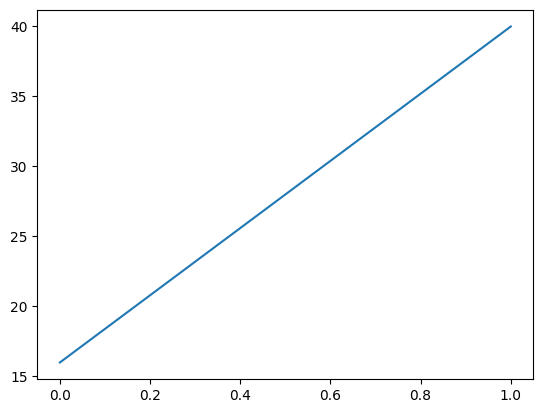

In [186]:
x = np.linspace(0, 1)
h = plt.plot(x, stats.uniform.ppf(x, f_tcb_loc, f_tcb_scale))

In [195]:
#valores random usando inversa (ppf supuestamente)
stats.uniform.ppf(random.random(),  f_tcb_loc, f_tcb_scale)

35.56209288822245

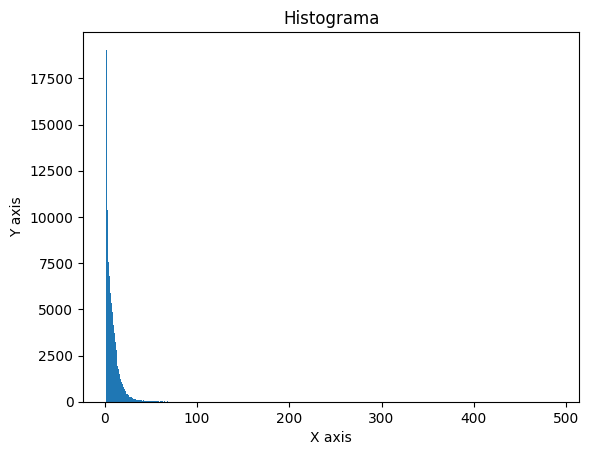

In [ ]:
# Armo función de prueba e imprimo
fprueba_mielke = stats.mielke.rvs(0.6363156884581391, 2.8594802803018897, loc=0.9999999999999999, scale=13.264432677998126, size=100000)

x = fprueba_mielke
#y = np.sort(x)

# plotting
plt.title("Histograma")
plt.xlabel("X axis")
plt.ylabel("Y axis")
plt.hist(x, bins=500)
plt.show()

In [ ]:
# Defino la funcion
def mielke(x):
  return 0.6363156884581391 * x**(0.6363156884581391-1) / (1+x**2.8594802803018897)**(1+0.6363156884581391/2.8594802803018897)

In [ ]:
# Saco inversa
import pynverse
inversa_mielke = pynverse.inversefunc(mielke,domain=[0,100], open_domain=[True,True],image=[0,100000])

In [ ]:
# Armo funcion que calcula el errro sabiendo que f(f^-1(x))=x
def error(x):
  xi = mielke(inversa_mielke(x))
  print(x, xi, x-xi)

error(1)
error(2)
error(3)
error(0.258421)
error(0.974126)
error(0.00065874)

1 1.0000000027365743 -2.7365743004992282e-09
2 1.999999997511082 2.488917960619119e-09
3 3.0000000011036674 -1.10366737970935e-09
0.258421 0.2584210001323518 -1.323517961893117e-10
0.974126 0.9741259997306364 2.6936364250218503e-10
0.00065874 0.0006587399991522492 8.47750797512703e-13


    INTERVALO
0           6
1           7
2          10
3           8
4           6
5           7
6           6
7           9
8           6
9          10
10          9
11          8
12         10
13         12
14          9
15         10
16          7
17          9
18          6
19          8
20         11
21         11
22          9
23          6
24          8
25         11
26         10
27         10
28          8
29         11
30         10
31          7
32         10
33          8
34         11
35          9
36          8
37          9
38         12
39          7


/usr/local/lib/python3.10/dist-packages/scipy/integrate/_quadpack_py.py:1233: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  quad_r = quad(f, low, high, args=args, full_output=self.full_output,
/usr/local/lib/python3.10/dist-packages/scipy/integrate/_quadpack_py.py:1233: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  quad_r = quad(f, low, high, args=args, full_output=self.full_output,
/usr/local/lib/python3.10/dist-packages/scipy/integrate/_quadpack_py.py:1233: I

,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
rdist,32.662062,inf,inf,inf,0.375000,1.466307e-05
johnsonsb,37.927826,487.361568,494.117086,inf,0.286354,2.135865e-03
powerlaw,38.163738,559.616022,564.682661,inf,0.595792,4.375929e-14
ncx2,39.525260,469.030993,475.786511,inf,0.385399,7.411068e-06
lognorm,39.528997,874.674533,879.741172,inf,0.482488,4.308368e-09


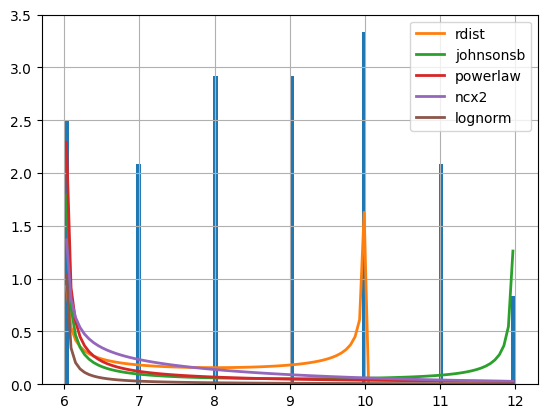

In [ ]:
df_llegadas_mesa_py = pd.read_csv("/content/llegadas_mesas_intervalos_python.csv")
print(df_llegadas_mesa_py)
df_llegadas_mesa_py.hist('INTERVALO',bins = 80, edgecolor='black')
f3 = Fitter(df_llegadas_mesa_py.INTERVALO)
f3.fit()
f3.summary()

In [ ]:
fprueba_mielke = stats.mielke.rvs(0.6363156884581391, 2.8594802803018897, loc=0.9999999999999999, scale=13.264432677998126, size=100)
print(list(map(lambda x: math.floor(x), fprueba_mielke)))

[9, 1, 1, 1, 3, 6, 8, 9, 2, 4, 10, 7, 3, 5, 3, 1, 5, 6, 1, 9, 6, 10, 6, 2, 2, 12, 22, 5, 10, 8, 14, 11, 1, 3, 6, 3, 22, 6, 4, 1, 33, 1, 12, 1, 8, 4, 1, 6, 15, 1, 2, 18, 1, 8, 12, 16, 5, 1, 7, 5, 15, 41, 1, 16, 12, 6, 1, 8, 7, 2, 7, 9, 4, 3, 8, 1, 1, 10, 1, 15, 6, 18, 1, 11, 19, 2, 8, 3, 1, 10, 2, 9, 14, 13, 1, 1, 12, 8, 113, 1]


    INTERVALO
0           4
1           8
2           2
3           4
4           4
5          12
6           4
7           6
8           8
9           2
10          4
11          5
12          5
13          3
14          9
15         14
16          3
17          2
18          8
19          8
20         11
21          5
22          1
23          2
24          3
25          1
26          1
27          1
28          1
29          9
30          1
31         27
32         10
33          3
34          2


/usr/local/lib/python3.10/dist-packages/scipy/integrate/_quadpack_py.py:1233: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  quad_r = quad(f, low, high, args=args, full_output=self.full_output,
/usr/local/lib/python3.10/dist-packages/scipy/integrate/_quadpack_py.py:1233: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  quad_r = quad(f, low, high, args=args, full_output=self.full_output,
/usr/local/lib/python3.10/dist-packages/scipy/integrate/_quadpack_py.py:1233: I

,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
burr,1.059062,887.701046,893.922439,inf,0.214154,0.068961
chi,1.060898,1046.886794,1051.552838,inf,0.205439,0.089928
truncweibull_min,1.079609,771.898034,779.674774,inf,0.171425,0.227521
recipinvgauss,1.085491,928.306516,932.972560,inf,0.248682,0.021550
pearson3,1.091336,933.537991,938.204035,inf,0.214672,0.067858


/usr/local/lib/python3.10/dist-packages/scipy/integrate/_quadpack_py.py:1233: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  quad_r = quad(f, low, high, args=args, full_output=self.full_output,


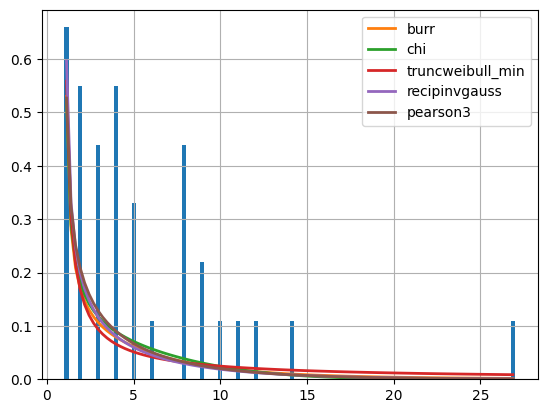

In [ ]:
df_llegadas_mesa_trucho = pd.read_csv("/content/llegadas_mesas_intervalos_python.csv")
print(df_llegadas_mesa_trucho)
df_llegadas_mesa_trucho.hist('INTERVALO',bins = 80, edgecolor='black')
f3 = Fitter(df_llegadas_mesa_trucho.INTERVALO)
f3.fit()
f3.summary()